# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [86]:
# Libraries
import pandas as pd

# Challenge 1

#### Read the `employees` dataset
Save your data in a variable called `employees`.

In [87]:
data = pd.read_csv('Employee.csv')
data.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [88]:
# Using Pivot Table to calculate mean salary by department
pivot_table_mean_salary = pd.pivot_table(data, values='Salary', index='Department', aggfunc='mean')

display("Mean salary by department using pivot table:")
display(pivot_table_mean_salary)

'Mean salary by department using pivot table:'

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [89]:
# Using groupby to calculate mean salary by department
mean_salary_by_department = data.groupby('Department')['Salary'].mean()

display("Mean salary by department without pivot table:")
display(mean_salary_by_department)

'Mean salary by department without pivot table:'

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [90]:
# Using Pivot Table to calculate mean salary by Department and Title
pivot_table_mean_salary = pd.pivot_table(data, values='Salary', index=['Department', 'Title'], aggfunc='mean')

display("Mean salary by Department and Title using pivot table:")
display(pivot_table_mean_salary)

'Mean salary by Department and Title using pivot table:'

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [91]:
# Using Pivot Table to display Years and Salary for each Title
pivot_table_years_salary = pd.pivot_table(data, values=['Years', 'Salary'], index='Title', aggfunc='mean')

display("Years and Salary for each Title using pivot table:")
display(pivot_table_years_salary)

'Years and Salary for each Title using pivot table:'

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [92]:
# Using groupby to find the mean Salary and number of employees in each Department and for each Title
result = data.groupby(['Department', 'Title']).agg({'Salary': 'mean', 'Name': 'count'})

# Renaming the columns for better readability
result.rename(columns={'Salary': 'Mean Salary', 'Name': 'Number of Employees'}, inplace=True)

display("Mean Salary and Number of Employees in each Department and for each Title:")
display(result)

'Mean Salary and Number of Employees in each Department and for each Title:'

Mean Salary  Number of Employees
Department Title                                      
HR         VP                70.0                    1
           analyst           32.5                    2
IT         VP                70.0                    1
           analyst           32.5                    2
           associate         60.0                    1
Sales      associate         55.0                    2

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [93]:
# Using groupby to find the Salary median, minimum, maximum, and standard deviation for each Department and Title
result = data.groupby(['Department', 'Title'])['Salary'].agg(['median', 'min', 'max', 'std'])

# Renaming the columns for better readability
result.rename(columns={'median': 'Median Salary', 'min': 'Minimum Salary', 'max': 'Maximum Salary', 'std': 'Standard Deviation'}, inplace=True)

display("Salary statistics for each Department and each Title:")
display(result)

'Salary statistics for each Department and each Title:'

Median Salary  Minimum Salary  Maximum Salary  \
Department Title                                                      
HR         VP                  70.0              70              70   
           analyst             32.5              30              35   
IT         VP                  70.0              70              70   
           analyst             32.5              30              35   
           associate           60.0              60              60   
Sales      associate           55.0              55              55   

                      Standard Deviation  
Department Title                          
HR         VP                        NaN  
           analyst              3.535534  
IT         VP                        NaN  
           analyst              3.535534  
           associate                 NaN  
Sales      associate            0.000000

In [94]:
"""
VP earn more than the others and theres NaN values to fill
"""

'\nVP earn more than the others and theres NaN values to fill\n'

#### Based on your comments, fill the missing values with an appropriate value.

In [95]:


# Sample data to create the DataFrame
data = {
    'Department': ['HR', 'HR', 'IT', 'IT', 'IT', 'Sales', 'Sales'],
    'Title': ['VP', 'analyst', 'VP', 'analyst', 'associate', 'associate', 'associate'],
    'Median Salary': [70.0, 32.5, 70.0, 32.5, 60.0, 55.0, None],
    'Minimum Salary': [70, 30, 70, 30, 60, 55, None],
    'Maximum Salary': [70, 35, 70, 35, 60, 55, None],
    'Standard Deviation': [None, 3.535534, None, 3.535534, None, 0.0, None]
}

# Convert the dictionary to a DataFrame
employee_data = pd.DataFrame(data)

# Fill missing 'Median Salary' with the median of their respective job titles and departments
median_salary = employee_data.groupby(['Department', 'Title'])['Median Salary'].transform('median')
employee_data['Median Salary'].fillna(median_salary, inplace=True)

# Fill missing 'Minimum Salary' with the filled 'Median Salary'
employee_data['Minimum Salary'].fillna(employee_data['Median Salary'], inplace=True)

# Fill missing 'Maximum Salary' with the filled 'Median Salary'
employee_data['Maximum Salary'].fillna(employee_data['Median Salary'], inplace=True)

# Fill missing 'Standard Deviation' with 0
employee_data['Standard Deviation'].fillna(0, inplace=True)

display(employee_data)


,Department,Title,Median Salary,Minimum Salary,Maximum Salary,Standard Deviation
0,HR,VP,70.0,70.0,70.0,0.000000
1,HR,analyst,32.5,30.0,35.0,3.535534
2,IT,VP,70.0,70.0,70.0,0.000000
3,IT,analyst,32.5,30.0,35.0,3.535534
4,IT,associate,60.0,60.0,60.0,0.000000
5,Sales,associate,55.0,55.0,55.0,0.000000
6,Sales,associate,55.0,55.0,55.0,0.000000


#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [96]:

# Sample data to create the DataFrame
data = {
    'Department': ['HR', 'HR', 'IT', 'IT', 'IT', 'Sales', 'Sales'],
    'Title': ['VP', 'analyst', 'VP', 'analyst', 'associate', 'associate', 'associate'],
    'Median Salary': [70.0, 32.5, 70.0, 32.5, 60.0, 55.0, None],
    'Minimum Salary': [70, 30, 70, 30, 60, 55, None],
    'Maximum Salary': [70, 35, 70, 35, 60, 55, None],
    'Standard Deviation': [None, 3.535534, None, 3.535534, None, 0.0, None]
}

# Convert the dictionary to a DataFrame
employee_data = pd.DataFrame(data)

# Fill missing 'Median Salary' with the median of their respective job titles and departments
median_salary = employee_data.groupby(['Department', 'Title'])['Median Salary'].transform('median')
employee_data['Median Salary'].fillna(median_salary, inplace=True)

# Fill missing 'Minimum Salary' with the filled 'Median Salary'
employee_data['Minimum Salary'].fillna(employee_data['Median Salary'], inplace=True)

# Fill missing 'Maximum Salary' with the filled 'Median Salary'
employee_data['Maximum Salary'].fillna(employee_data['Median Salary'], inplace=True)

# Fill missing 'Standard Deviation' with 0
employee_data['Standard Deviation'].fillna(0, inplace=True)

# Calculate the number of employees in each department
num_employees = employee_data.groupby('Department').size()

# Calculate the total salary expenditure for each department
total_salary_expenditure = employee_data.groupby('Department')['Median Salary'].sum()

# Combine the results into a new DataFrame
department_summary = pd.DataFrame({
    'Number of Employees': num_employees,
    'Total Salary Expenditure': total_salary_expenditure
})

display(department_summary)


,Number of Employees,Total Salary Expenditure
Department,,
HR,2,102.5
IT,3,162.5
Sales,2,110.0


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [97]:
import pandas as pd

# Sample data to create the DataFrame
data = {
    'Department': ['HR', 'HR', 'IT', 'IT', 'IT', 'Sales', 'Sales'],
    'Title': ['VP', 'analyst', 'VP', 'analyst', 'associate', 'associate', 'associate'],
    'Years': [5, 2, 3, 4, 1, 3, 2],
    'Salary': [70000, 32000, 70000, 32000, 60000, 55000, 60000]
}

# Convert the dictionary to a DataFrame
employee_data = pd.DataFrame(data)

# Calculate the total years of work experience and mean salary for each department and title
department_title_summary = employee_data.groupby(['Department', 'Title']).agg({
    'Years': 'sum',
    'Salary': 'mean'
}).reset_index()

display(department_title_summary)


,Department,Title,Years,Salary
0,HR,VP,5,70000.0
1,HR,analyst,2,32000.0
2,IT,VP,3,70000.0
3,IT,analyst,4,32000.0
4,IT,associate,1,60000.0
5,Sales,associate,5,57500.0


## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [100]:

# Load the data from 'Employee.csv' into a DataFrame
data = pd.read_csv('Employee.csv')

# Create a DataFrame with the indices of the rows containing the maximum salary for each department
max_salary_indices = data.groupby('Department')['Salary'].idxmax()

#  Remove the rows with the maximum salary for each department
data_removed_max_salary = data.drop(max_salary_indices)

# Pivot table with the mean Salary for each Department
pivot_table_mean_salary = data_removed_max_salary.pivot_table(values='Salary', index='Department', aggfunc='mean')

display(pivot_table_mean_salary)


,Salary
Department,
HR,32.500000
IT,41.666667
Sales,55.000000


# Challenge 2

#### Read the `fitbit` dataset 
Save your data in a variable called `fitbit`.

In [ ]:
data = pd.read_csv('Fitbit.csv')
data.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [ ]:
# Display the data types of each column
data_types = data.dtypes
display("Data Types:")
display(data_types)

# Display descriptive statistics for numerical columns
descriptive_stats = data.describe()
display("\nDescriptive Statistics:")
display(descriptive_stats)

# Display basic information about the dataset
dataset_info = data.info()
display("\nDataset Information:")
display(dataset_info)

'Data Types:'

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

'\nDescriptive Statistics:'

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

'\nDataset Information:'

None

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [ ]:
# Compute the correlation between 'Minutes Very Active' and 'Steps'
correlation = data['Minutes Very Active'].corr(data['Steps'])

display("Correlation between 'Minutes Very Active' and 'Steps':", correlation)

"Correlation between 'Minutes Very Active' and 'Steps':"

0.5714518481062612

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [ ]:
import matplotlib.pyplot as plt;

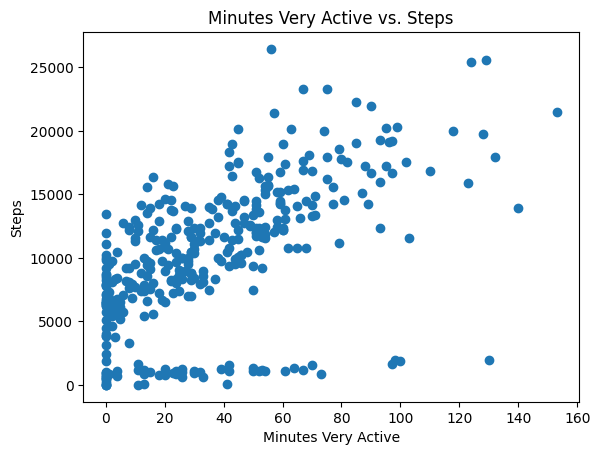

In [ ]:
plt.scatter(data['Minutes Very Active'], data['Steps'])
plt.title('Minutes Very Active vs. Steps')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
Positive Relationship : As the 'Minutes Very Active' increases, the 'Steps' also tend to increase.
There's tendency for individuals who are more active (spending more minutes being very active) to take more steps.

Linear Trend: The data points in the plot follow a roughly linear trend.
Meaning that as 'Minutes Very Active' increases, the 'Steps' increase in a proportional manner.

Outliers : few data points that deviate from the general trend in the scatter plot.
Could represent individuals with specific behaviors or activities that lead to either higher or lower 'Steps' counts for a given 'Minutes Very Active' value.

Data Range :'Minutes Very Active' values and 'Steps' values cover a wide range.
The dataset contains information on individuals with varying levels of activity and step counts

"""

"\nPositive Relationship : As the 'Minutes Very Active' increases, the 'Steps' also tend to increase.\nThere's tendency for individuals who are more active (spending more minutes being very active) to take more steps.\n\nLinear Trend: The data points in the plot follow a roughly linear trend.\nMeaning that as 'Minutes Very Active' increases, the 'Steps' increase in a proportional manner.\n\nOutliers : few data points that deviate from the general trend in the scatter plot.\nCould represent individuals with specific behaviors or activities that lead to either higher or lower 'Steps' counts for a given 'Minutes Very Active' value.\n\nData Range :'Minutes Very Active' values and 'Steps' values cover a wide range.\nThe dataset contains information on individuals with varying levels of activity and step counts\n\n"

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [ ]:
# Compute the correlation between 'Minutes Sedentary' and 'Steps'
correlation = data['Minutes Sedentary'].corr(data['Steps'])

display("Correlation between 'Minutes Sedentary' and 'Steps':", correlation)

"Correlation between 'Minutes Sedentary' and 'Steps':"

0.07690608062990098

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

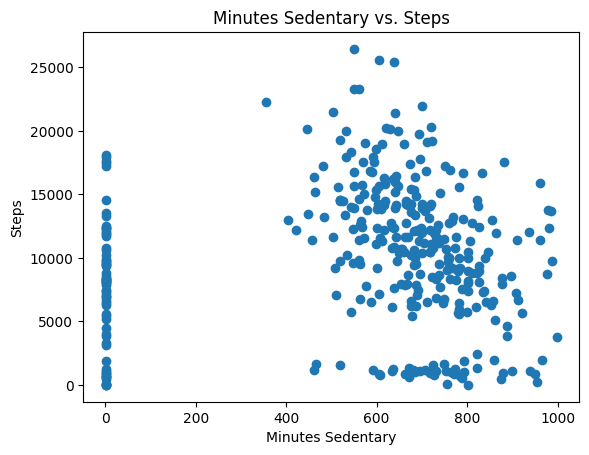

"Correlation between 'Minutes Sedentary' and 'Steps':"

0.07690608062990098

In [ ]:
plt.scatter(data['Minutes Sedentary'], data['Steps'])
plt.title('Minutes Sedentary vs. Steps')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

# Compute the correlation between 'Minutes Sedentary' and 'Steps'
correlation = data['Minutes Sedentary'].corr(data['Steps'])

display("Correlation between 'Minutes Sedentary' and 'Steps':", correlation)

In [ ]:
"""
 Suggests that as individuals spend more time being sedentary ('Minutes Sedentary' increases), they tend to take more steps ('Steps' increases). 
 This would imply that less sedentary behavior is associated with higher physical activity (more steps).
"""

"\n Suggests that as individuals spend more time being sedentary ('Minutes Sedentary' increases), they tend to take more steps ('Steps' increases). \n This would imply that less sedentary behavior is associated with higher physical activity (more steps).\n"

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [ ]:
# Compute the correlation between 'MinutesOfSleep' and 'Steps'
correlation = data['MinutesOfSleep'].corr(data['Steps'])

display("Correlation between 'MinutesOfSleep' and 'Steps':", correlation)

"Correlation between 'MinutesOfSleep' and 'Steps':"

0.1309856595083637

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

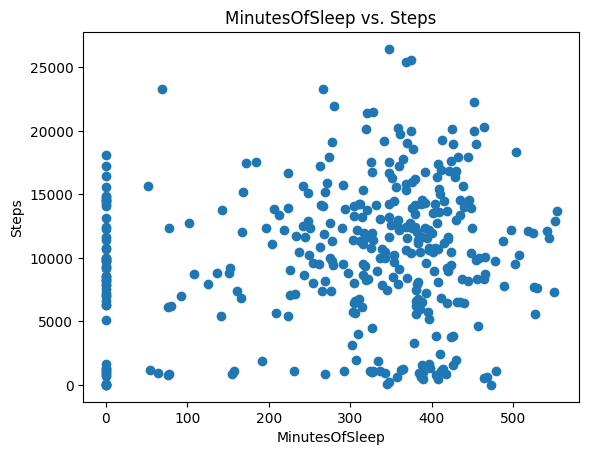

"Correlation between 'MinutesOfSleep' and 'Steps':"

0.1309856595083637

In [ ]:
# Uncomment and complete the following code to create the plot
plt.scatter(data['MinutesOfSleep'], data['Steps'])
plt.title('MinutesOfSleep vs. Steps')
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')
plt.show()

# Compute the correlation between 'MinutesOfSleep' and 'Steps'
correlation = data['MinutesOfSleep'].corr(data['Steps'])

display("Correlation between 'MinutesOfSleep' and 'Steps':", correlation)


In [ ]:
"""
Suggests that there is little to no linear relationship between 'MinutesOfSleep' and 'Steps.' 
The amount of sleep may not have a strong influence on the number of steps taken.
"""

"\nSuggests that there is little to no linear relationship between 'MinutesOfSleep' and 'Steps.' \nThe amount of sleep may not have a strong influence on the number of steps taken.\n"

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [ ]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [ ]:
# Select the subset of the dataset with specific columns
selected_columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']
subset_data = data[selected_columns]

# Compute the correlation matrix
cor_fit = subset_data.corr()

display(cor_fit)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [ ]:
# Sort the correlations of 'Steps' with other features in descending order
steps_correlations = cor_fit['Steps'].sort_values(ascending=False)

display(steps_correlations)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [ ]:
data = pd.read_csv('time_grades.csv')

display(data.head())

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the `time_grades` dataset.

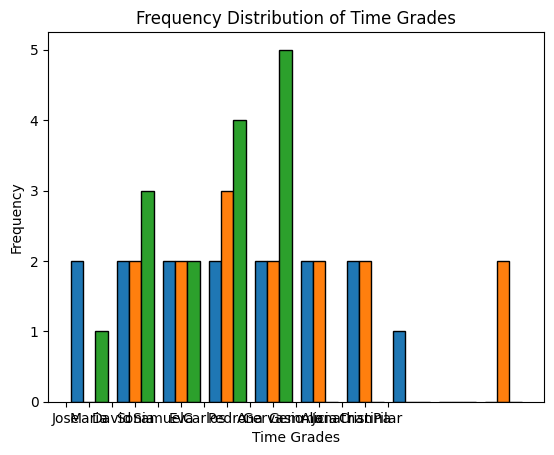

In [ ]:
#Create a histogram to visualize the frequency distribution
plt.hist(data, bins=10, edgecolor='black')
plt.xlabel('Time Grades')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Time Grades')
plt.show()

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [ ]:
# Calculate Pearson correlation coefficient
pearson_corr = data['Study time'].corr(data['Grade'], method='pearson')

# Calculate Spearman correlation coefficient
spearman_corr = data['Study time'].corr(data['Grade'], method='spearman')

display("Pearson correlation coefficient:", pearson_corr)
display("Spearman correlation coefficient:", spearman_corr)

'Pearson correlation coefficient:'

0.7980456073578858

'Spearman correlation coefficient:'

0.819658753036942

In [ ]:
"""
Both correlation coefficients show a positive relationship between Study time and Grade, with the Spearman correlation slightly higher than the Pearson correlation. 
Indicates that students who spend more time studying tend to achieve higher grades, and the relationship is not necessarily strictly linear.
"""

'\nBoth correlation coefficients show a positive relationship between Study time and Grade, with the Spearman correlation slightly higher than the Pearson correlation. \nIndicates that students who spend more time studying tend to achieve higher grades, and the relationship is not necessarily strictly linear.\n'

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

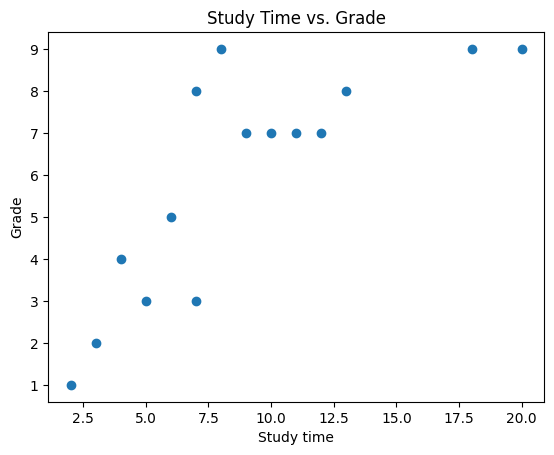

'Pearson correlation coefficient:'

0.7980456073578858

'Spearman correlation coefficient:'

0.819658753036942

In [ ]:
# Create a scatter plot to visualize the relationship between 'Study time' and 'Grade'
plt.scatter(data['Study time'], data['Grade'])
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.title('Study Time vs. Grade')
plt.show()

display("Pearson correlation coefficient:", pearson_corr)
display("Spearman correlation coefficient:", spearman_corr)

In [ ]:
"""
Data suggests that investing more time in studying is associated with better grade.
"""

'\nData suggests that investing more time in studying is associated with better grade.\n'

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
The values being close to 1 indicate that there is a relatively strong association between the two variables.
"""

'\nThe values being close to 1 indicate that there is a relatively strong association between the two variables.\n'